##### Airline Passenger Satisfaction from Kaggle.com
##### Analysis author: Keiron Quesada Claudel - 2025

#### Phase 1: Download and import the dataset from Kaggle and the libraries to use

In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
import os
import joblib
warnings.filterwarnings("ignore")

path = '../data/train.csv'
save_path = '../models'

# Load the dataset
df = pd.read_csv(path, index_col=0)

# Display first 5 rows to understand the data
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


#### Phase 2: Data Mining

In [2]:
# Display data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     103904 no

In [3]:
# Display the data types of each column
df.dtypes

id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

In [4]:
# Display total amount of null values
df.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [5]:
# Disply the null values
df[df.isnull().any(axis=1)]

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
213,49608,Female,Loyal Customer,38,Business travel,Eco,109,5,3,3,...,5,5,2,4,1,1,5,31,NaN,satisfied
1124,73442,Male,Loyal Customer,53,Personal Travel,Eco,1012,3,2,3,...,4,4,4,4,3,3,4,38,NaN,neutral or dissatisfied
1529,71178,Male,Loyal Customer,39,Business travel,Business,733,2,5,5,...,2,2,2,2,2,2,3,11,NaN,neutral or dissatisfied
2004,72940,Female,disloyal Customer,26,Business travel,Business,1035,3,3,3,...,2,3,3,4,5,5,2,41,NaN,neutral or dissatisfied
2108,116374,Female,Loyal Customer,24,Personal Travel,Eco,417,2,1,2,...,5,1,4,2,1,2,5,1,NaN,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102067,36729,Male,Loyal Customer,49,Personal Travel,Eco Plus,1249,2,5,2,...,3,4,5,4,3,4,3,230,NaN,neutral or dissatisfied
102384,71241,Male,Loyal Customer,58,Business travel,Eco,733,3,3,3,...,3,3,1,2,4,2,3,55,NaN,neutral or dissatisfied
102552,27684,Female,disloyal Customer,29,Business travel,Eco,1107,2,1,1,...,5,4,1,5,5,3,5,0,NaN,neutral or dissatisfied
102960,36787,Male,Loyal Customer,58,Business travel,Eco,1088,4,4,1,...,5,1,5,5,5,3,5,0,NaN,satisfied


In [6]:
# Display duplicated rows
df.duplicated().sum()

np.int64(0)

#### Phase 3: Data processing

In [7]:
# Copy the dataset to a new variable
df_copy = df.copy()

In [8]:
# Display the current column names
print(df_copy.columns.tolist())


['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction']


In [9]:
# Rename columns to maintain consistency
df_copy.rename(columns={
    'id': 'Id',
    'satisfaction': 'Satisfaction'
}, inplace=True)


In [10]:
# Check changes
df_copy.head()

,Id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [11]:
# Replace NaN values with the number 0
df_copy.fillna(0, inplace=True)

In [12]:
# Disply if there is null values yet
df_copy[df_copy.isnull().any(axis=1)]

,Id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Satisfaction


### Phase 4: Data Analysis

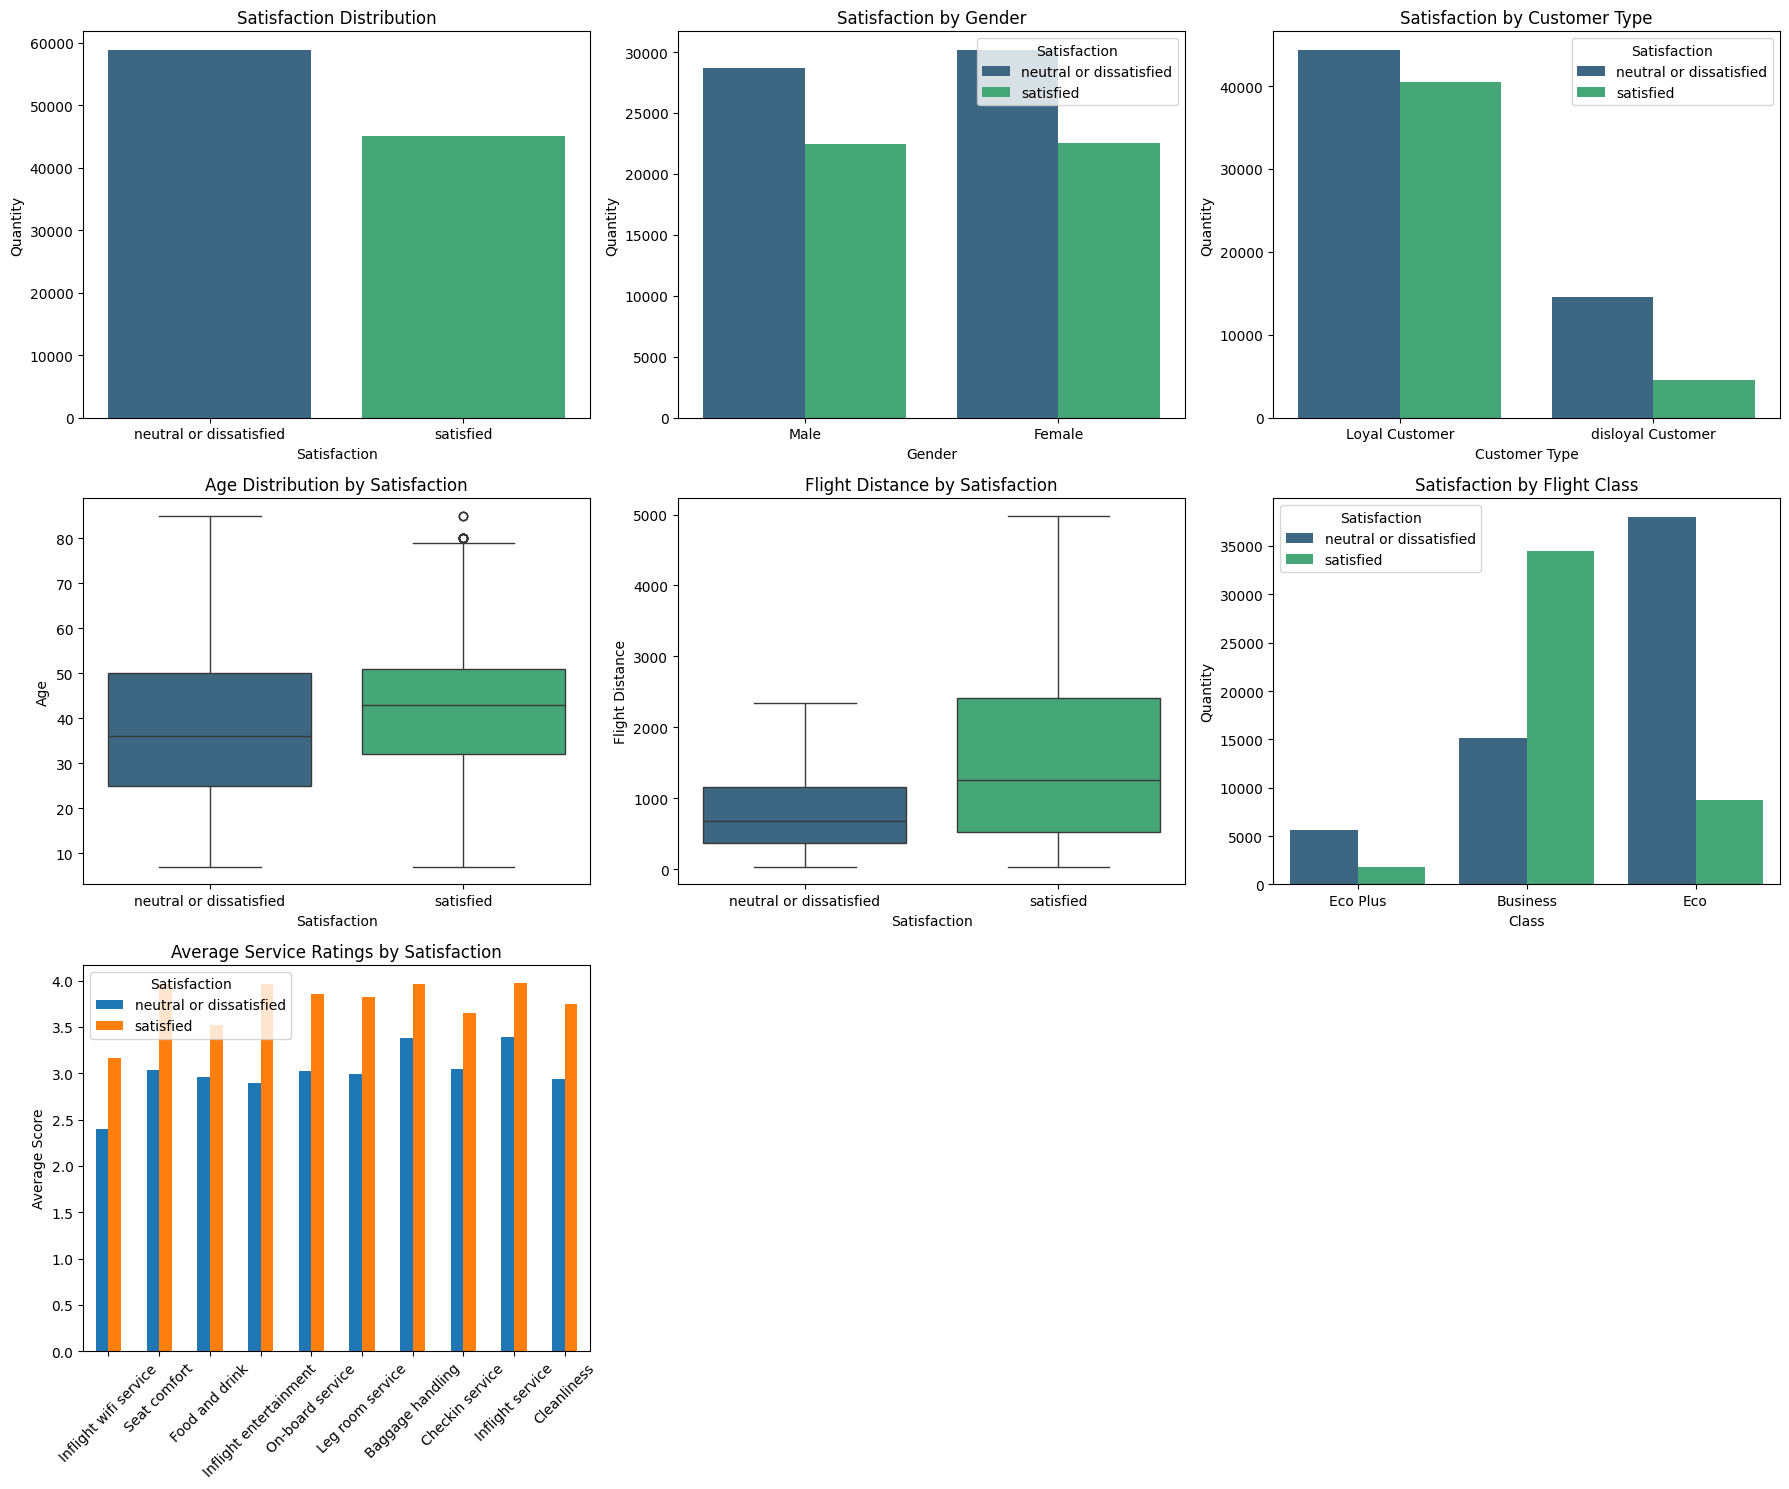

In [13]:
# Define the figure and axes (3 columns x 3 rows)
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()  # Convert to list for easy indexing

# 1. Satisfaction Distribution Histogram
sns.countplot(data=df_copy, x='Satisfaction', palette='viridis', ax=axes[0])
axes[0].set_title("Satisfaction Distribution")
axes[0].set_xlabel("Satisfaction")
axes[0].set_ylabel("Quantity")

# 2. Satisfaction by gender
sns.countplot(data=df_copy, x='Gender', hue='Satisfaction', palette='viridis', ax=axes[1])
axes[1].set_title("Satisfaction by Gender")
axes[1].set_xlabel("Gender")
axes[1].set_ylabel("Quantity")

# 3. Satisfaction by customer type
sns.countplot(data=df_copy, x='Customer Type', hue='Satisfaction', palette='viridis', ax=axes[2])
axes[2].set_title("Satisfaction by Customer Type")
axes[2].set_xlabel("Customer Type")
axes[2].set_ylabel("Quantity")

# 4. Age distribution by satisfaction
sns.boxplot(data=df_copy, x='Satisfaction', y='Age', palette='viridis', ax=axes[3])
axes[3].set_title("Age Distribution by Satisfaction")
axes[3].set_xlabel("Satisfaction")
axes[3].set_ylabel("Age")

# 5. Flight distance by satisfaction
sns.boxplot(data=df_copy, x='Satisfaction', y='Flight Distance', palette='viridis', showfliers=False, ax=axes[4])
axes[4].set_title("Flight Distance by Satisfaction")
axes[4].set_xlabel("Satisfaction")
axes[4].set_ylabel("Flight Distance")

# 6. Satisfaction by Flight Class
sns.countplot(data=df_copy, x='Class', hue='Satisfaction', palette='viridis', ax=axes[5])
axes[5].set_title("Satisfaction by Flight Class")
axes[5].set_xlabel("Class")
axes[5].set_ylabel("Quantity")

# 7. Average service ratings by satisfaction
service_cols = [
    'Inflight wifi service', 'Seat comfort', 'Food and drink', 
    'Inflight entertainment', 'On-board service', 'Leg room service', 
    'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness'
]
service_means = df_copy.groupby('Satisfaction')[service_cols].mean().T
service_means.plot(kind='bar', ax=axes[6],)
axes[6].set_title("Average Service Ratings by Satisfaction")
axes[6].set_ylabel("Average Score")
axes[6].tick_params(axis='x', rotation=45)

# Hide empty axes if there are any
for i in range(7, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

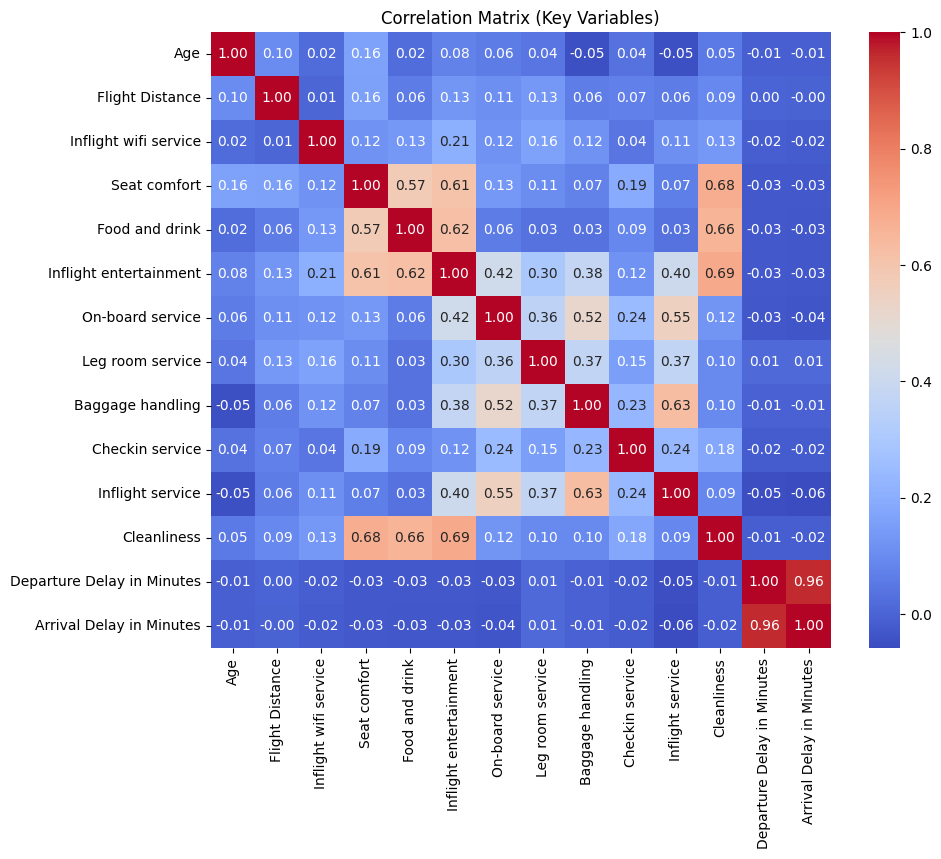

In [14]:
# 9. Heatmap of correlation between key variables

# Columns of interest for correlation analysis
cols_interes = [
    'Age', 'Flight Distance', 'Inflight wifi service', 'Seat comfort',
    'Food and drink', 'Inflight entertainment', 'On-board service',
    'Leg room service', 'Baggage handling', 'Checkin service',
    'Inflight service', 'Cleanliness', 'Departure Delay in Minutes',
    'Arrival Delay in Minutes'
]

# Correlation matrix
corr = df_copy[cols_interes].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Key Variables)")
plt.show()

In [15]:
# Calculates the gap between satisfied and neutral/dissatisfied customers for each service
service_gaps = df_copy.groupby('Satisfaction')[service_cols].mean()
gaps = service_gaps.loc['satisfied'] - service_gaps.loc['neutral or dissatisfied']

# Sort the gaps to find the most dissatisfied services
top_dissatisfied_services = gaps.sort_values(ascending=False).index.tolist()

print("Top 3 Most Dissatisfied Services:")
for service in top_dissatisfied_services[:3]:
    gap = gaps[service]
    print(f"- {service} {gap:.1f}")

Top 3 Most Dissatisfied Services:
- Inflight entertainment 1.1
- Seat comfort 0.9
- On-board service 0.8


>> Note: Services with a large gap are more important because they are what really separate satisfied customers from dissatisfied ones.

### Phase 5: Summarize

> 1. There are more dissatisfied and neutral people than satisfied ones which describes that there's something that can improve in the flight industry services.

> 2. Even if there are a lot of dissatisfied males, most of the dissatisfied people are females.

> 3. Most of the dissatisfied people are Loyal Clients, which leads to something that even if there are a lot of satisfied people, could have negatively affected others in majority. We could do a survey and ask for what service or situacion is mostly annoying them.

> 4. The average age of dissatisfied people is around 37 years old, and the satisfied age average is around 41 years old, which means that satisfied people have an average age of +4 more years old

> 6. There are some outliers respecting the age, which are around 80+ years old, this means that there were senior citizens aboard.

> 7. Most of the satisfied people did travel a longer distance than the dissatisfied ones, according to the reports above, there are a difference of around 350 miles in average, meaning that the flight distance is related to satisfaction too.

> 8. Most of the dissatisfied people traveled within the economic class, meaning that the issues can be related to services offered to them.

> 9. According to the average service ratings, the top 3 most problematic services offered were: 

                >> - Inflight entertainment 1.1
                >> - Seat comfort 0.9
                >> - On-board service 0.8
                
> 10. Although, there are some more services that are qualified as problematic, meaning that Satisfaction is multifactorial.

### Phase 6: Modeling

## Random Forest Model

              precision    recall  f1-score   support

       False       0.96      0.98      0.97     11713
        True       0.97      0.94      0.96      9068

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



<Axes: >

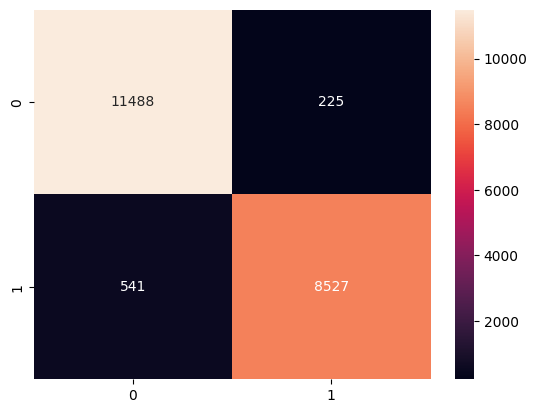

In [16]:
# 6. Preprocessing for ML
df_encoded = pd.get_dummies(df_copy, drop_first=True)
X = df_encoded.drop('Satisfaction_satisfied', axis=1)
y = df_encoded['Satisfaction_satisfied']

# 7. Training the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Save the model and feature columns for future use 
feature_columns = X.columns.tolist()
joblib.dump(model, os.path.join(save_path, "rf_model.joblib"))
joblib.dump(feature_columns, os.path.join(save_path, "rf_feature_columns.joblib"))

# 8. Evaluating the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

### Understanding the model Random Forest

> 1. It is particularly effective at identifying dissatisfied customers, which is valuable for the business because it allows for early intervention.

> 2. With 96% accuracy, you can trust the predictions for decision-making.

> 3. No apparent overfitting: Balanced metrics

## Logistic Regression Model

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best parameters found: {'solver': 'lbfgs', 'class_weight': None, 'C': np.float64(0.021544346900318832)}
Best F1 score in CV: 0.8241569025022888

Classification report on test set:
              precision    recall  f1-score   support

       False       0.86      0.85      0.86     11713
        True       0.81      0.82      0.82      9068

    accuracy                           0.84     20781
   macro avg       0.84      0.84      0.84     20781
weighted avg       0.84      0.84      0.84     20781

Confusion matrix:
 [[10014  1699]
 [ 1600  7468]]


<Axes: >

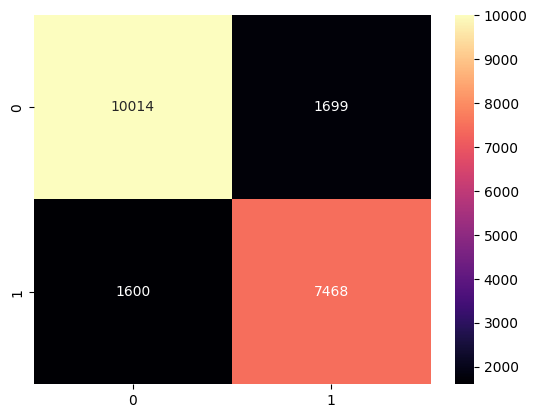

In [17]:
## Logistic Regression Model

param_dist = {
    'C': np.logspace(-2, 1, 10),
    'solver': ['lbfgs', 'saga'],
    'class_weight': [None, 'balanced']
}

random_search = RandomizedSearchCV(
    LogisticRegression(max_iter=2000),
    param_distributions=param_dist,
    n_iter=5,   # Only uses 5 combinations
    cv=3,
    scoring='f1',
    n_jobs=2,   # Core limit
    verbose=2,
    random_state=42
)
random_search.fit(X_train, y_train)

# Show best parameters
print("Best parameters found:", random_search.best_params_)
print("Best F1 score in CV:", random_search.best_score_)

# Save best model
best_log_reg = random_search.best_estimator_
save_path = "./model"  # Path to save
os.makedirs(save_path, exist_ok=True)
joblib.dump(best_log_reg, os.path.join(save_path, 'logistic_regression_best.pkl'))
joblib.dump(X_train.columns, os.path.join(save_path, 'feature_columns.pkl'))

# Evaluate on test data
y_pred = best_log_reg.predict(X_test)
print("\nClassification report on test set:")
print(classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='magma')


#### Understanding the model LogisticRegression

> 1. The model achieved 84% accuracy with balanced performance for both satisfied and unsatisfied passengers.

> 2. It correctly identifies most cases in both categories, with recall scores of 0.85 (Unsatisfied) and 0.82 (Satisfied).

> 3. This model is efficient, easy to understand, and can serve as a good starting point for future improvements.

### Phase 8: Processing and testing models with data that It has not seen before in training

In [18]:
# Import the new dataset for testing the model
new_data_path = '../data/test.csv'

df_test = pd.read_csv(new_data_path, index_col=0)

print("Loaded dataset Info:")
print(f"Shape: {df_test.shape}")

Loaded dataset Info:
Shape: (25976, 24)


In [19]:
print(f"Columns: {list(df_test.columns)}")

Columns: ['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction']


In [20]:
print("First 5 rows:")
df_test.head()

First 5 rows:


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [21]:
# Copy the test dataset to a new variable
df_test_copy = df_test.copy() 

In [22]:
# Rename columns to maintain consistency
df_test_copy.rename(columns={
    'id': 'Id',
    'satisfaction': 'Satisfaction'
}, inplace=True)

In [23]:
df_test_copy.isnull().sum()

Id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
Satisfaction                          0
dtype: int64

In [24]:
# Replace NaN values with the number 0
df_test_copy.fillna(0, inplace=True)

In [25]:
# Check if there are any null values left
df_test_copy.isnull().sum()

Id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
Satisfaction                         0
dtype: int64

## Testing model: Random Forest

In [29]:
# Load model and feature columns for Random Forest
rf_model = joblib.load("../models/rf_model.joblib")
rf_feature_columns = joblib.load("../models/rf_feature_columns.joblib")

# Set the target column
target_col = 'Satisfaction_satisfied'  # Target

# Encode categorical variables
df_test_encoded = pd.get_dummies(df_test_copy, drop_first=True)

# Align columns with training features
X_new = df_test_encoded.reindex(columns=rf_feature_columns, fill_value=0)

# Extract y_test if available
if target_col in df_test_encoded.columns:
    y_new = df_test_encoded[target_col]
else:
    y_new = None

# Predict using the model
y_pred_new = rf_model.predict(X_new)

# If labels exist, evaluate
if y_new is not None:
    print(classification_report(y_new, y_pred_new))
    print(confusion_matrix(y_new, y_pred_new))

              precision    recall  f1-score   support

       False       0.96      0.98      0.97     14573
        True       0.97      0.94      0.96     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

[[14268   305]
 [  643 10760]]


              precision    recall  f1-score   support

       False       0.96      0.98      0.97     14573
        True       0.97      0.94      0.96     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



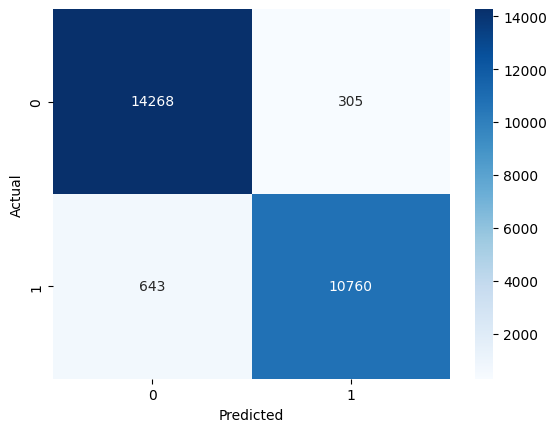

In [30]:
# Evaluating the model on new data
print(classification_report(y_new, y_pred_new))

sns.heatmap(confusion_matrix(y_new, y_pred_new), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Understanding the model with new data : Random Forest

> The Random Forest classification model achieved 96% overall accuracy, with balanced metrics across both classes and a low error rate. It demonstrates consistent performance and is suitable for production, provided continuous monitoring is in place and the impact of false negatives is evaluated according to business needs.

## Testing model: Logistic Regression

In [31]:
# # Load model and feature columns
log_reg = joblib.load("../models/logistic_regression_model.pkl")
feature_columns = joblib.load("../models/lr_feature_columns.pkl")

# Define target column
target_col = 'Satisfaction_satisfied'

# Encode categorical variables
df_test_encoded = pd.get_dummies(df_test_copy, drop_first=True)

# Align columns with training set (filling missing with 0)
X_new = df_test_encoded.reindex(columns=feature_columns, fill_value=0)

# Extract y_test (if the test dataset has it)
if target_col in df_test_encoded.columns:
    y_new = df_test_encoded[target_col]
else:
    y_new = None  # No labels in the new dataset

# Make predictions
y_pred_new = log_reg.predict(X_new)

# If y_test exists, evaluate performance
if y_new is not None:
    from sklearn.metrics import classification_report, confusion_matrix
    print(classification_report(y_new, y_pred_new))
    print(confusion_matrix(y_new, y_pred_new))

              precision    recall  f1-score   support

       False       0.85      0.82      0.83     14573
        True       0.78      0.81      0.79     11403

    accuracy                           0.81     25976
   macro avg       0.81      0.81      0.81     25976
weighted avg       0.82      0.81      0.81     25976

[[11907  2666]
 [ 2168  9235]]


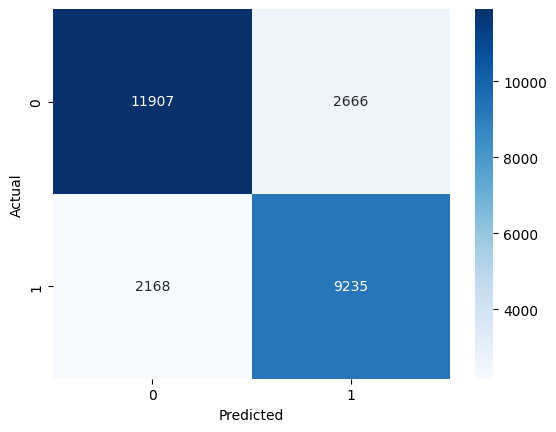

In [32]:
sns.heatmap(confusion_matrix(y_new, y_pred_new), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Understanding the model with new data : Logistic Regression

> The Logistic Regression classification model achieved 81% overall accuracy, with balanced performance overall. However, if we compare this model with the Random Forest, Logistic Regression tends to fall behind according to the classification report, with this information we can conclude that the Random Forest model is still the best suitable option for production purposes. However it is important to mention that Logistic Regression can be further optimized for better results as well as Random Forest model.